##### Importing Data :

In [21]:
from keras.datasets import imdb 

(d_train, l_train) , (d_test, l_test) = imdb.load_data(num_words=10000)

##### Experimenting with word decoding from the given imdb data :

In [22]:
word_index = imdb.get_word_index()
word_dict = dict([(word,index) for (index, word) in word_index.items()])

In [23]:
example = ' '.join([word_dict.get(i-3,'$') for i in d_train[4]])
example

"$ worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the $ and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

#### Preparing the data for the NN :

In [25]:
import numpy as np

#creating 2D tensor to hold the info for words for all reviews the review 
def vectorize_sequences(sequences, dimensions):
    results = np.zeros((len(sequences),dimensions))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

X_train = vectorize_sequences(d_train,int(1e4))
X_test = vectorize_sequences(d_test,int(1e4))
#showing a sample vector
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [26]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [27]:
y_train = np.asarray(l_train).astype("float32")
y_test = np.asarray(l_test).astype("float32")

#### Building the Neural Net :

In [28]:
from keras import models, layers

model = models.Sequential()
#adding our model layers
model.add(layers.Dense(16, activation="relu", input_shape=[int(1e4)]))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [29]:
#specifying optimzier, loss function and metrics to monitor
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])

##### Training the model :

In [30]:
#partitioning validation data
x_validate = X_train[-int(1e4):]
y_validate = y_train[-int(1e4):]

partial_x_train = X_train[:-int(1e4)]
partial_y_train = y_train[:-int(1e4)]

In [31]:
history  = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validate,y_validate))

Epoch 1/20
30/30 [==============================] - 81s 2s/step - loss: 0.5332 - acc: 0.7821 - val_loss: 0.4189 - val_acc: 0.8568
Epoch 2/20
30/30 [==============================] - 3s 97ms/step - loss: 0.3251 - acc: 0.9002 - val_loss: 0.3214 - val_acc: 0.8780
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2315 - acc: 0.9247 - val_loss: 0.2919 - val_acc: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 51ms/step - loss: 0.1812 - acc: 0.9433 - val_loss: 0.2754 - val_acc: 0.8905
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1472 - acc: 0.9529 - val_loss: 0.2785 - val_acc: 0.8909
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1203 - acc: 0.9642 - val_loss: 0.2975 - val_acc: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0977 - acc: 0.9717 - val_loss: 0.3145 - val_acc: 0.8845
Epoch 8/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0819 - ac

##### Plotting the loss, accuracy of the model

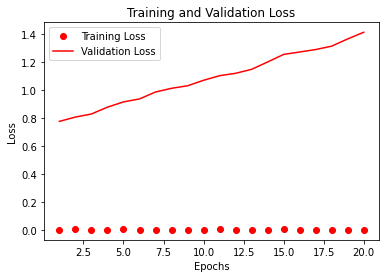

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'ro', label="Training Loss")
plt.plot(epochs, validation_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


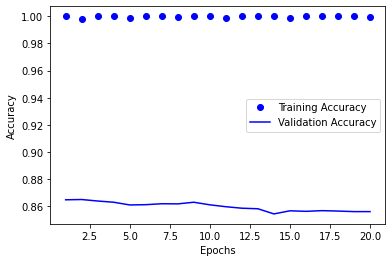

In [ ]:
training_acc = history_dict["acc"]
validation_acc = history_dict["val_acc"]

plt.plot(epochs,training_acc,"bo",label="Training Accuracy")
plt.plot(epochs, validation_acc, "b", label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()